# Problem Statement

1.Delivery_time -> Predict delivery time using sorting time

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data1 = pd.read_csv("delivery_time.csv")  #It will load data

In [43]:
data= data1.copy() #This will be back up for our data

# DATA EXPLORATION

In [44]:
data.head(5) # This line of code will show first five rows of data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [45]:
data.tail(5) # This line of code will show last five rows of data

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


data.describe()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# DATA PROCESSING

### IDENTIFYING NULL(MISSING ) VALUES

In [47]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [48]:
# There is no missing/null value in data set

### IDENTIFYING DUPLICATES

In [49]:
duplicated_rows=data[data.duplicated()]

In [50]:
print(duplicated_rows)

Empty DataFrame
Columns: [Delivery Time, Sorting Time]
Index: []


In [51]:
#There is no duplicate value in given data set

### IDENTIFYING OUTLIERS

<Axes: >

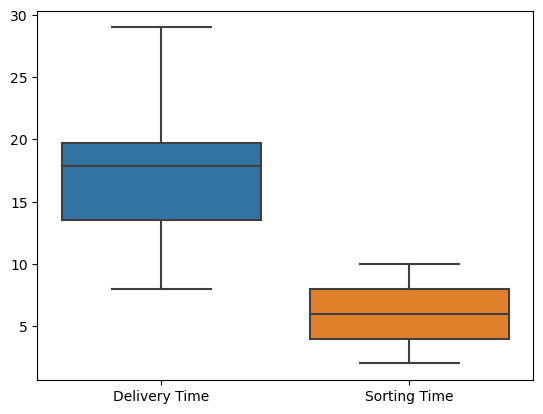

In [52]:
sns.boxplot(data)

In [53]:
# Here we can see that there is no outlier present

# DATA VISUALIZATION

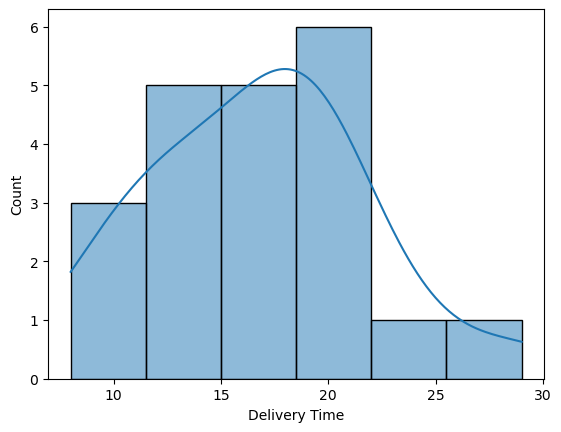

In [54]:
sns.histplot(data['Delivery Time'],kde=True)
plt.show()

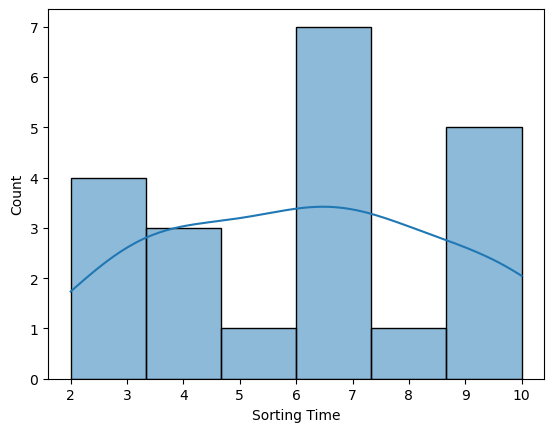

In [55]:
sns.histplot(data['Sorting Time'],kde=True)
plt.show()

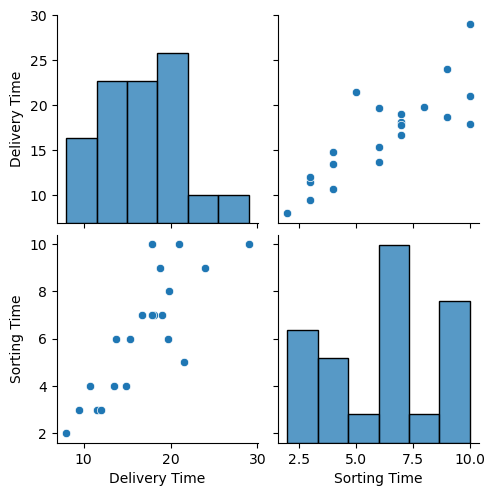

In [56]:
sns.pairplot(data)

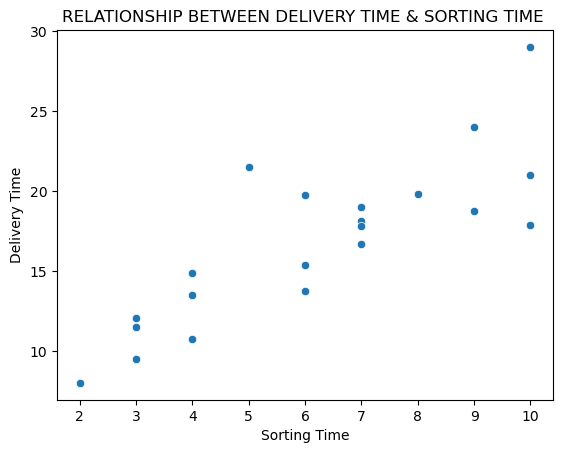

In [57]:
sns.scatterplot(x=data['Sorting Time'], y=data['Delivery Time'])
plt.title("RELATIONSHIP BETWEEN DELIVERY TIME & SORTING TIME ")
plt.show()

### In above scatter plot we visualize the relation between delivery time and sorting time, it show positive linear trend showing that sorting time, increase delivery time tends to increase.
### This showing strong positive correlation between year of sorting time & delivery time 

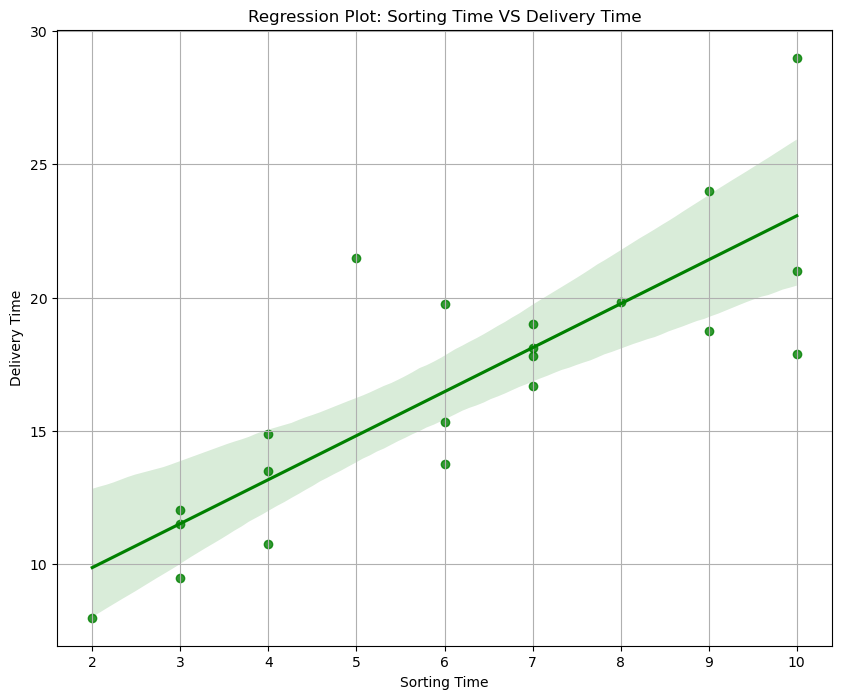

In [58]:
plt.figure(figsize=(10,8))
sns.regplot(data,x='Sorting Time', y='Delivery Time', color="green")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Regression Plot: Sorting Time VS Delivery Time")
plt.grid()
plt.show()

### Here we can see strong positive correlation. we can see there is positive Slope.it also showing that as sorting time increase delivery time tends to incrase

In [59]:
correlation_matrix=data.corr()
print('correlation:',correlation_matrix)

correlation:                Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


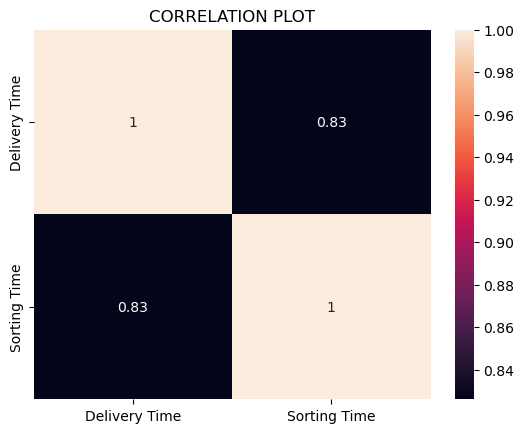

In [60]:
sns.heatmap(correlation_matrix,annot=True)
plt.title("CORRELATION PLOT")
plt.show()

# Splitting Data

In [61]:
from sklearn.model_selection import train_test_split
X =data['Sorting Time']
y=data['Delivery Time']
X=X.values.reshape(-1,1)


In [62]:
X_train, X_test ,y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=42)

### It will split data into Testing and Training Phase. Training=80% & Testing = 20% data

# Model Selection

In [63]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
print(y_pred,y_test)

[24.9247435  18.85200984 12.77927618 12.77927618 24.9247435 ] 0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery Time, dtype: float64


# Model Evaluation

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.9025888966971176
Mean Squared Error (MSE): 14.046738956635016
Root Mean Squared Error (RMSE): 3.7478979383962705
R-squared (R2): -1.0207599586367362


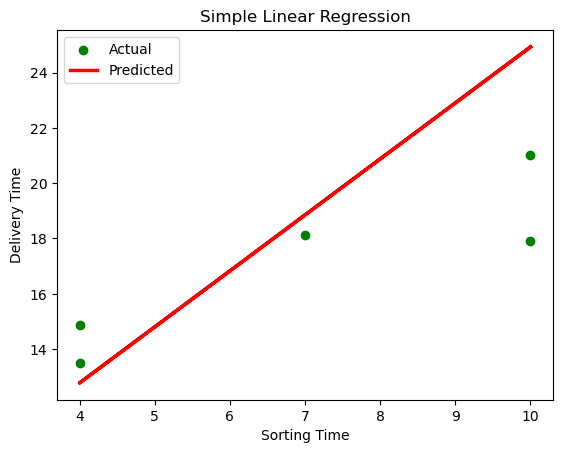

In [65]:
plt.scatter(X_test, y_test, color='green',label='Actual')
plt.plot(X_test,y_pred,color="red",linewidth=2.5,label='Predicted')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# Polynominal Regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures


In [67]:
polynomial_convertor= PolynomialFeatures(degree=2,include_bias=False)

In [68]:
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [69]:
poly_features= polynomial_convertor.transform(X)

In [70]:
poly_features.shape

(21, 2)

In [71]:
poly_features[0]

array([ 10., 100.])

In [72]:
polynomial_convertor.fit_transform(X)

array([[ 10., 100.],
       [  4.,  16.],
       [  6.,  36.],
       [  9.,  81.],
       [ 10., 100.],
       [  6.,  36.],
       [  7.,  49.],
       [  3.,   9.],
       [ 10., 100.],
       [  9.,  81.],
       [  8.,  64.],
       [  4.,  16.],
       [  7.,  49.],
       [  3.,   9.],
       [  3.,   9.],
       [  4.,  16.],
       [  6.,  36.],
       [  7.,  49.],
       [  2.,   4.],
       [  7.,  49.],
       [  5.,  25.]])

### Split data into training and testing sets 70% training data and 30% testing data

In [73]:
X_train,X_test, y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=42)

In [74]:
poly_model= LinearRegression()

In [75]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [76]:
test_predications=poly_model.predict(X_test)

In [77]:
poly_model.coef_

array([1.69239725, 0.02396842])

# Model Evaluation

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
MAE = mean_absolute_error(y_test,test_predications)
MSE= mean_squared_error(y_test,test_predications)
RMSE= np.sqrt(MSE)

print('MAE= ',MAE)
print('MSE= ',MSE)
print('RMSE= ',RMSE)

MAE=  2.6504285783826247
MSE=  11.984070310741796
RMSE=  3.4618015989859665


In [84]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    
    poly_convertor = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_convertor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    
    train_pred = poly_model.predict(X_train)
    test_pred = poly_model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [85]:
train_rmse_error

[2.7770666832487807,
 2.7740014211319646,
 2.2384893699768895,
 2.1090492390296416,
 2.011496675531447,
 1.6837870694779742,
 1.64822668055009,
 1.648226680549878,
 1.6482266805498331]

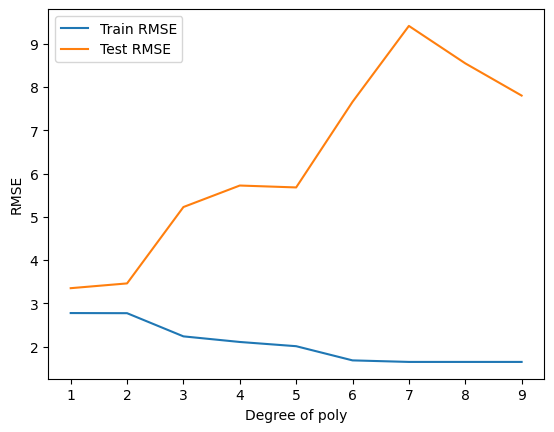

In [86]:
plt.plot(range(1,10),train_rmse_error, label='Train RMSE')
plt.plot(range(1,10),test_rmse_error,label='Test RMSE')

plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend();

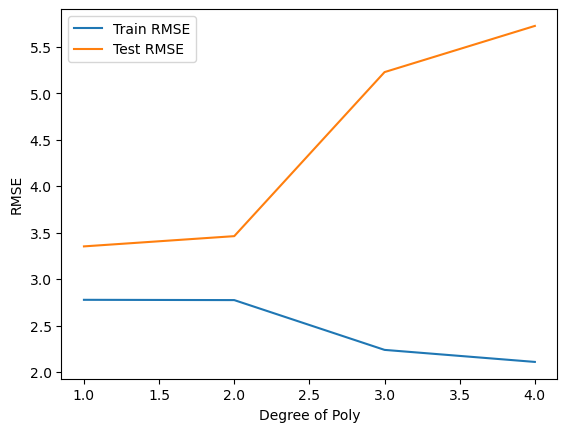

In [87]:
plt.plot(range(1,5),train_rmse_error[:4],label='Train RMSE')
plt.plot(range(1,5),test_rmse_error[:4],label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

In [88]:
final_poly_convertor= PolynomialFeatures(degree=2,include_bias=False)


In [89]:
final_model=LinearRegression()

In [90]:
full_converted_x=final_poly_convertor.fit_transform(X)
final_model.fit(full_converted_x,y)

LinearRegression()

# Model Deployment

In [91]:
# from joblib import dump, load
#dump(final_model,'final_poly_model.joblib')